### Import necessary packages 

In [1]:
import os
import numpy as np
import h5py
import scipy.io
np.random.seed(7) # for reproducibility

import keras.backend as K
from keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib
#from concise.utils.plot import seqlogo, seqlogo_fig

import sys
sys.path.append("../Scripts/")
from IntegratedGradients import *
from util_funcs import *
from plotseqlogo import seqlogo, seqlogo_fig


Using TensorFlow backend.


### load trained models

In [2]:
#load models and obtain integrated gradients
path_to_model = "../Results/"
path_to_modelhigh= path_to_model + "model_RBPshigh.h5"
path_to_modelmed= path_to_model + "model_RBPsmed.h5"
path_to_modellow= path_to_model + "model_RBPslow.h5"

model_high=load_model(path_to_modelhigh, custom_objects={'precision': precision,'recall': recall }) 
igres_high = integrated_gradients(model_high) 

model_med=load_model(path_to_modelmed, custom_objects={'precision': precision,'recall': recall }) 
igres_med = integrated_gradients(model_med) 

model_low=load_model(path_to_modellow, custom_objects={'precision': precision,'recall': recall }) 
igres_low = integrated_gradients(model_low) 

#RBPnames for each model
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])
RBPnames_med=np.array(['TARDBP', 'ELAVL2', 'ELAVL3', 'ELAVL4', 'RBM20', 'IGF2BP1', 'IGF2BP2', 'IGF2BP3', 'EWSR1', 'HNRNPD', 'RBPMS', 'SRRM4', 'AGO2', 'NUDT21', 'FIP1L1', 'CAPRIN1', 'FMR1iso7', 'FXR2', 'AGO1', 'L1RE1', 'ORF1'])
RBPnames_high=np.array(['DND1', 'CPSF7', 'CPSF6', 'CPSF1', 'CSTF2', 'CSTF2T', 'ZC3H7B', 'FMR1iso1', 'RBM10', 'MOV10', 'ELAVL1'])



Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.
Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.
Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.


## Effect of sequence varients

### ELAVL1

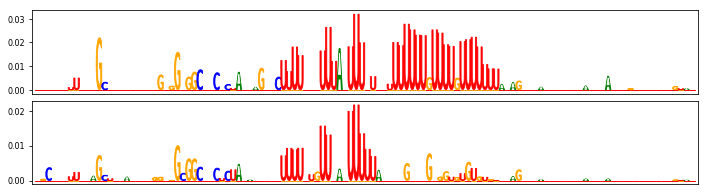

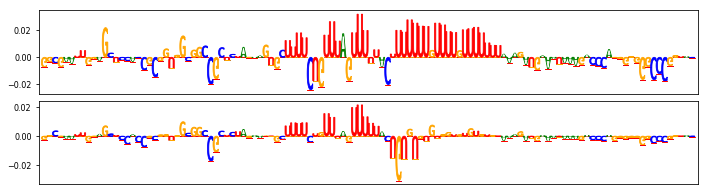

In [3]:
WT1="GGGCGAAUUGGAGCUCCACCGCGGUGGCGGCCGCUCUAGAAGUGCUUUUCUGUUUAGUUUUUACUUUUUUUGUUUUGUUUUUUUAAAGAUGAAAUAAAGACCCAGGGGGGGCCCGGUAC"
MT1="GGGCGAAUUGGAGCUCCACCGCGGUGGCGGCCGCUCUAGAAGUGCUUUUCUGUUUAGUUUUUACUgUgUgUGUggUGUgUgUgUAAAGAUGAAAUAAAGACCCAGGGGGGGCCCGGUAC"

### Add Ns so that the size is equal to the input size(150)
ELAVL1 = np.array([seq_to_mat("N"*31+WT1),seq_to_mat("N"*31+MT1)]) 
ch_ind = np.where(RBPnames_high=="ELAVL1")[0][0]
ind=[0,1]

reg_coded=np.full((250, 4), 0.25)

seqin=np.array([seq_to_mat("N"*31+WT1),seq_to_mat("N"*31+MT1)])
regin=np.array([reg_coded,reg_coded])

ind=[0,1]
ex_seq = np.array([igres_high.explain([seqin[i],regin[i]],outc=ch_ind,reference=False)[0] for i in ind])

plt.close("all")


### showing only positive attributions
seqlogo_fig(np.transpose(ex_seq[:,32:150,:4].clip(min=0, max=None),axes=(1,2,0)), vocab="RNA", figsize=(10,3), ncol=1)
plt.show()


### showing all attributions
seqlogo_fig(np.transpose(ex_seq[:,32:150,:4],axes=(1,2,0)), vocab="RNA", figsize=(10,3), ncol=1)
plt.show()

### QKI 

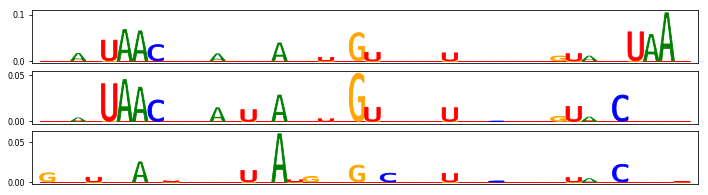

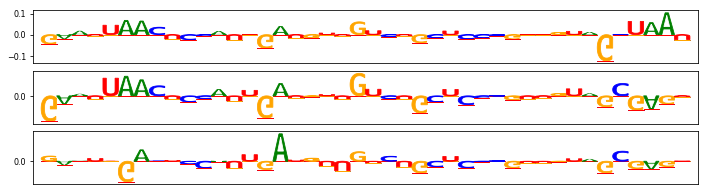

In [4]:
seqbase1="GAATTAACTCCATTGATGTTGTCTGCTCCCGTTGTAGCTAAT"
seqbase2="GAATTAACTCCATTGATGTTGTCTGCTCCCGTTGTAGCgAgT"
seqbase3="GAATTgACTCCATTGATGTTGTCTGCTCCCGTTGTAGCgAgT"

seqw="n"*54+seqbase1+"n"*54
seqm1="n"*54+seqbase2+"n"*54
seqm2="n"*54+seqbase3+"n"*54

seqw_coded=seq_to_mat(seqw) 
seqm1_coded=seq_to_mat(seqm1) 
seqm2_coded=seq_to_mat(seqm2) 

reg_coded=np.full((250, 4), 0.25)

seqin=np.array([seqw_coded,seqm1_coded,seqm2_coded])
regin=np.array([reg_coded,reg_coded,reg_coded])

ch_ind=np.where(RBPnames_low=="QKI")[0][0]

ind=[0,1,2]
ex_seq = np.array([igres_low.explain([seqin[i],regin[i]],outc=ch_ind,reference=False)[0] for i in ind])

### showing only positive attributions
plt.close("all")
seqlogo_fig(np.transpose(ex_seq[:,54:96,:4].clip(min=0, max=None),axes=(1,2,0)), vocab="RNA", figsize=(10,3), ncol=1)

plt.show()

### showing all attributions
seqlogo_fig(np.transpose(ex_seq[:,54:96,:4],axes=(1,2,0)), vocab="RNA", figsize=(10,3), ncol=1)
plt.show()
